In [2]:
# coding: utf-8

In [3]:
# Import necessary libraries
import pandas as pd
import MySQLdb
from pandas import Series, DataFrame

In [4]:
# Establish connexcion DB
mysql_cn = MySQLdb.connect(host='localhost', 
                port=3306,user='cvsanaly', passwd='cvsanaly', 
                db='maven_trunk')

In [5]:
# Charge necessary tables
action_files = pd.read_sql('select * from action_files ', con=mysql_cn)
actions = pd.read_sql('select * from actions', con=mysql_cn)
actions_file_names = pd.read_sql('select * from actions_file_names', con=mysql_cn)
commit_graph = pd.read_sql('select * from commit_graph', con=mysql_cn)
file_copies = pd.read_sql('select * from file_copies',con=mysql_cn)
branches = pd.read_sql('select * from branches',con=mysql_cn)

file_links = pd.read_sql('select * from file_links', con=mysql_cn)
files = pd.read_sql('select * from files', con=mysql_cn)
people = pd.read_sql('select * from people', con=mysql_cn)
repositories = pd.read_sql('select * from repositories', con=mysql_cn)
scmlog = pd.read_sql('select * from scmlog',con=mysql_cn)

tag_revisions = pd.read_sql('select * from tag_revisions', con=mysql_cn)
tags = pd.read_sql('select * from tags',con=mysql_cn)


In [6]:
# how length tables
print 'loaded dataframe action_files. records:', len(action_files)
print 'loaded dataframe actions. records:', len(actions)
print 'loaded dataframe actions_file_names. records:', len(actions_file_names)
print 'loaded dataframe commit_graph. records:', len(commit_graph)
print 'loaded dataframe file_copies. records:', len(file_copies)
print 'loaded dataframe file_links. records:', len(file_links)
print 'loaded dataframe files. records:', len(files)
print 'loaded dataframe people. records:', len(people)
print 'loaded dataframe repositories. records:', len(repositories)
print 'loaded dataframe scmlog. records:', len(scmlog)
print 'loaded dataframe tag_revisions. records:', len(tag_revisions)
print 'loaded dataframe tags. records:', len(tags)

loaded dataframe action_files. records: 6146
loaded dataframe actions. records: 6146
loaded dataframe actions_file_names. records: 6146
loaded dataframe commit_graph. records: 0
loaded dataframe file_copies. records: 256
loaded dataframe file_links. records: 2142
loaded dataframe files. records: 2039
loaded dataframe people. records: 57
loaded dataframe repositories. records: 1
loaded dataframe scmlog. records: 3231
loaded dataframe tag_revisions. records: 0
loaded dataframe tags. records: 0


In [7]:
#################### 1. STUDY THE DATA BASE STRUCTURE ####################

In [8]:
#################### BEGIN 1 ####################

In [9]:
# Tables: actions_file_names, commit_graph, repositories, tag_revisions and records are empty

In [10]:
# Display columns for tables
list=[action_files,actions,actions_file_names,file_copies,file_links,files,people,repositories,scmlog,tag_revisions,tags]
list1=['action_files','actions','actions_file_names','file_copies','file_links','files','people','repositories','scmlog','tag_revisions','tags']
for l in range(len(list)):
    print list1[l]+' : '
    for col in list[l].columns :
        print col+'|',
    print ''


action_files : 
file_id| action_id| action_type| commit_id| 
actions : 
id| type| file_id| commit_id| branch_id| 
actions_file_names : 
id| type| file_id| new_file_name| commit_id| 
file_copies : 
id| to_id| from_id| from_commit_id| new_file_name| action_id| 
file_links : 
id| parent_id| file_id| commit_id| file_path| 
files : 
id| file_name| repository_id| 
people : 
id| name| email| 
repositories : 
id| uri| name| type| 
scmlog : 
id| rev| committer_id| author_id| date| date_tz| author_date| author_date_tz| message| composed_rev| repository_id| 
tag_revisions : 
id| tag_id| commit_id| 
tags : 
id| name| 


In [11]:
# Display statistics for action_files
action_files.describe()

file_id    action_id    commit_id
count  6146.000000  6146.000000  6146.000000
mean   1041.690042  3075.588513  1446.763423
std     566.940023  1775.119814   996.983254
min       4.000000     1.000000     1.000000
25%     716.250000  1539.250000   480.000000
50%    1078.000000  3075.500000  1398.500000
75%    1517.000000  4612.750000  2375.000000
max    2039.000000  6149.000000  3231.000000

In [12]:
# Display statistics for action_files
actions.describe()

id      file_id    commit_id  branch_id
count  6146.000000  6146.000000  6146.000000     6146.0
mean   3075.588513  1041.340384  1446.763423        1.0
std    1775.119814   566.905966   996.983254        0.0
min       1.000000     4.000000     1.000000        1.0
25%    1539.250000   716.000000   480.000000        1.0
50%    3075.500000  1078.000000  1398.500000        1.0
75%    4612.750000  1517.000000  2375.000000        1.0
max    6149.000000  2039.000000  3231.000000        1.0

In [13]:
# Display statistics for action_files
scmlog.describe()

id  committer_id  composed_rev  repository_id
count  3231.000000   3231.000000        3231.0         3231.0
mean   1616.000000     20.728877           0.0            1.0
std     932.853686     15.369671           0.0            0.0
min       1.000000      1.000000           0.0            1.0
25%     808.500000      3.000000           0.0            1.0
50%    1616.000000     23.000000           0.0            1.0
75%    2423.500000     27.000000           0.0            1.0
max    3231.000000     57.000000           0.0            1.0

In [14]:
# dispay scmlog table
scmlog

id      rev  committer_id author_id                date date_tz  \
0        1   163818             1      None 2005-04-06 18:43:41    None   
1        2   163828             1      None 2005-04-07 09:01:44    None   
2        3   163829             1      None 2005-04-07 09:04:57    None   
3        4   163830             1      None 2005-04-07 09:39:14    None   
4        5   163831             1      None 2005-04-07 15:12:05    None   
5        6   163832             1      None 2005-04-07 15:58:46    None   
6        7   163838             1      None 2005-04-07 18:07:27    None   
7        8   163843             1      None 2005-04-07 19:28:09    None   
8        9   163849             1      None 2005-04-08 04:15:09    None   
9       10   163855             1      None 2005-04-08 06:48:04    None   
10      11   163858             2      None 2005-04-08 07:34:41    None   
11      12   163860             2      None 2005-04-08 07:54:52    None   
12      13   163861             1      None 2005-04-08 08:10:09    None   
13      14   163881             1      None 2005-04-08 13:16:04    None   
14      15   163882             1      None 2005-04-08 14:06:28    None   
15      16   163883             1      None 2005-04-08 18:21:42    None   
16      17   163885             1      None 2005-04-08 19:13:50    None   
17      18   163889             1      None 2005-04-09 04:07:15    None   
18      19   163903             1      None 2005-04-11 18:30:57    None   
19      20   163904             1      None 2005-04-11 18:58:35    None   
20      21   163907             1      None 2005-04-12 03:44:37    None   
21      22   163927             1      None 2005-04-13 07:11:49    None   
22      23   163928             3      None 2005-04-13 07:23:44    None   
23      24   163929             3      None 2005-04-13 07:25:25    None   
24      25   163938             1      None 2005-04-13 13:54:45    None   
25      26   163944             1      None 2005-04-14 08:28:59    None   
26      27   163955             1      None 2005-04-15 13:08:16    None   
27      28   163957             1      None 2005-04-15 14:23:27    None   
28      29   164172             1      None 2005-04-22 07:19:04    None   
29      30   164322             1      None 2005-04-23 05:12:07    None   
...    ...      ...           ...       ...                 ...     ...   
3201  3202  1761369            26      None 2016-09-19 01:07:48    None   
3202  3203  1761980            55      None 2016-09-22 19:12:53    None   
3203  3204  1762171            26      None 2016-09-25 11:42:24    None   
3204  3205  1762180            26      None 2016-09-25 12:26:44    None   
3205  3206  1762200            26      None 2016-09-25 15:34:08    None   
3206  3207  1762679            26      None 2016-09-28 17:18:06    None   
3207  3208  1762680            26      None 2016-09-28 17:19:31    None   
3208  3209  1763052            55      None 2016-10-02 13:17:34    None   
3209  3210  1765121            56      None 2016-10-16 10:38:10    None   
3210  3211  1766161            48      None 2016-10-21 23:46:19    None   
3211  3212  1766182            48      None 2016-10-22 12:36:56    None   
3212  3213  1766203            26      None 2016-10-22 16:51:12    None   
3213  3214  1766286            26      None 2016-10-23 16:21:07    None   
3214  3215  1766899            26      None 2016-10-28 00:06:20    None   
3215  3216  1767345            26      None 2016-10-31 18:40:26    None   
3216  3217  1767355            41      None 2016-10-31 20:11:50    None   
3217  3218  1767575            41      None 2016-11-01 21:58:35    None   
3218  3219  1767576            41      None 2016-11-01 22:01:08    None   
3219  3220  1768095            50      None 2016-11-04 21:57:53    None   
3220  3221  1768096            50      None 2016-11-04 22:01:51    None   
3221  3222  1768104            50      None 2016-11-04 22:22:17    None   
3222  3223  1769203            48

In [15]:
# dispay branches table
branches

id             name
0   1            trunk
1   2  maven-2.0.11-RC

In [16]:
# dispay action_files table
action_files

file_id  action_id action_type  commit_id
0           4          1           A          1
1           5          2           A          1
2           6          3           A          1
3           7          4           A          1
4           8          5           A          1
5           9          6           A          1
6          10          7           A          1
7          11          8           A          1
8           7          9           M          2
9          12         10           A          2
10         11         11           M          2
11         13         12           A          2
12         14         13           A          2
13         15         14           A          2
14          7         15           M          3
15         12         16           M          4
16         16         17           A          4
17         17         18           A          4
18         18         19           A          4
19         11         20           M          4
20         19         21           A          4
21         13         22           M          4
22         12         23           M          5
23         11         24           M          5
24         19         25           M          5
25         20         26           A          6
26          7         27           M          6
27         17         28           M          6
28         13         29           M          6
29         19         30           M          7
...       ...        ...         ...        ...
6116     1352       3342           R       1525
6117     1354       3343           R       1525
6118     1357       3344           R       1525
6119     1360       3345           R       1525
6120     1362       3346           R       1525
6121     1365       3347           R       1525
6122     1368       3348           R       1525
6123     1370       3349           R       1525
6124     1373       3350           R       1525
6125     1376       3351           R       1525
6126     1378       3352           R       1525
6127     1381       3353           R       1525
6128     1384       3354           R       1525
6129     1386       3355           R       1525
6130     1389       3356           R       1525
6131     1392       3357           R       1525
6132     1394       3358           R       1525
6133     1397       3359           R       1525
6134     1400       3360           R       1525
6135     1402       3361           R       1525
6136     1405       3362           R       1525
6137     1408       3363           R       1525
6138     1411       3364           R       1525
6139     1414       3365           R       1525
6140     1417       3366           R       1525
6141     1419       3367           R       1525
6142     1421       3368           R       1525
6143     1424       3369           R       1525
6144     1473       3623           R       1704
6145     1476       3624           R       1704

[6146 rows x 4 columns]

In [17]:
# dispay actions table
actions

id type  file_id  commit_id  branch_id
0        1    A        4          1          1
1        2    A        5          1          1
2        3    A        6          1          1
3        4    A        7          1          1
4        5    A        8          1          1
5        6    A        9          1          1
6        7    A       10          1          1
7        8    A       11          1          1
8        9    M        7          2          1
9       10    A       12          2          1
10      11    M       11          2          1
11      12    A       13          2          1
12      13    A       14          2          1
13      14    A       15          2          1
14      15    M        7          3          1
15      16    M       12          4          1
16      17    A       16          4          1
17      18    A       17          4          1
18      19    A       18          4          1
19      20    M       11          4          1
20      21    A       19          4          1
21      22    M       13          4          1
22      23    M       12          5          1
23      24    M       11          5          1
24      25    M       19          5          1
25      26    A       20          6          1
26      27    M        7          6          1
27      28    M       17          6          1
28      29    M       13          6          1
29      30    M       19          7          1
...    ...  ...      ...        ...        ...
6116  6120    M      855       3204          1
6117  6121    M      855       3205          1
6118  6122    M      855       3206          1
6119  6123    M     2036       3207          1
6120  6124    M     2036       3208          1
6121  6125    M     1968       3209          1
6122  6126    M     1517       3210          1
6123  6127    M     1519       3211          1
6124  6128    M     1519       3212          1
6125  6129    M     2037       3212          1
6126  6130    M     2037       3213          1
6127  6131    M     1697       3214          1
6128  6132    M     1691       3215          1
6129  6133    M     1517       3216          1
6130  6134    M     1691       3217          1
6131  6135    M     1697       3218          1
6132  6136    M     1517       3219          1
6133  6137    M     1691       3220          1
6134  6138    M     1691       3221          1
6135  6139    M     1691       3222          1
6136  6140    M     1755       3223          1
6137  6141    M     1517       3224          1
6138  6142    M     1704       3225          1
6139  6143    M      136       3226          1
6140  6144    M      136       3227          1
6141  6145    M     1517       3228          1
6142  6146    A     2038       3229          1
6143  6147    A     2039       3229          1
6144  6148    M     1517       3230          1
6145  6149    M     1758       3231          1

[6146 rows x 5 columns]

In [18]:
# We dont need to work with action

In [19]:
# dispay actions table
actions_file_names

id type  file_id new_file_name  commit_id
0        1    A        4          None          1
1        2    A        5          None          1
2        3    A        6          None          1
3        4    A        7          None          1
4        5    A        8          None          1
5        6    A        9          None          1
6        7    A       10          None          1
7        8    A       11          None          1
8        9    M        7          None          2
9       10    A       12          None          2
10      11    M       11          None          2
11      12    A       13          None          2
12      13    A       14          None          2
13      14    A       15          None          2
14      15    M        7          None          3
15      16    M       12          None          4
16      17    A       16          None          4
17      18    A       17          None          4
18      19    A       18          None          4
19      20    M       11          None          4
20      21    A       19          None          4
21      22    M       13          None          4
22      23    M       12          None          5
23      24    M       11          None          5
24      25    M       19          None          5
25      26    A       20          None          6
26      27    M        7          None          6
27      28    M       17          None          6
28      29    M       13          None          6
29      30    M       19          None          7
...    ...  ...      ...           ...        ...
6116  6120    M      855          None       3204
6117  6121    M      855          None       3205
6118  6122    M      855          None       3206
6119  6123    M     2036          None       3207
6120  6124    M     2036          None       3208
6121  6125    M     1968          None       3209
6122  6126    M     1517          None       3210
6123  6127    M     1519          None       3211
6124  6128    M     1519          None       3212
6125  6129    M     2037          None       3212
6126  6130    M     2037          None       3213
6127  6131    M     1697          None       3214
6128  6132    M     1691          None       3215
6129  6133    M     1517          None       3216
6130  6134    M     1691          None       3217
6131  6135    M     1697          None       3218
6132  6136    M     1517          None       3219
6133  6137    M     1691          None       3220
6134  6138    M     1691          None       3221
6135  6139    M     1691          None       3222
6136  6140    M     1755          None       3223
6137  6141    M     1517          None       3224
6138  6142    M     1704          None       3225
6139  6143    M      136          None       3226
6140  6144    M      136          None       3227
6141  6145    M     1517          None       3228
6142  6146    A     2038          None       3229
6143  6147    A     2039          None       3229
6144  6148    M     1517          None       3230
6145  6149    M     1758          None       3231

[6146 rows x 5 columns]

In [20]:
# dispay commit_graph table
commit_graph

Empty DataFrame
Columns: [commit_id, parent_id]
Index: []

In [21]:
# dispay file_copies table
file_copies

id  to_id  from_id  from_commit_id  \
0      1    198      198             NaN   
1      2     55       55             NaN   
2      3     15       15             NaN   
3      4     12       12             NaN   
4      5     60       60             NaN   
5      6     19       19             NaN   
6      7     56       56             NaN   
7      8     56       56            54.0   
8      9    275      275             NaN   
9     10    199      199             NaN   
10    11    627      563             NaN   
11    12    628      565             NaN   
12    13    138      138             NaN   
13    14    472      472             NaN   
14    15    634      634             NaN   
15    16    749      199           154.0   
16    17    750      526             NaN   
17    18    727      727             NaN   
18    19     43       43             NaN   
19    20    637      637             NaN   
20    21    101      101             NaN   
21    22    132      132             NaN   
22    23    711      711             NaN   
23    24    711      711           181.0   
24    25    791      790             NaN   
25    26    793      792             NaN   
26    27    727      727             NaN   
27    28    728      728           214.0   
28    29    729      729           214.0   
29    30    729      729           215.0   
..   ...    ...      ...             ...   
226  227   1859     1818             NaN   
227  228   1860     1820             NaN   
228  229   1861     1822             NaN   
229  230   1862     1824             NaN   
230  231   1863     1826             NaN   
231  232   1864     1828             NaN   
232  233   1865     1830             NaN   
233  234   1866     1832             NaN   
234  235   1867     1834             NaN   
235  236   1868     1836             NaN   
236  237   1869     1838             NaN   
237  238   1870     1840             NaN   
238  239   1871     1842             NaN   
239  240   1872     1843             NaN   
240  241   1873     1716             NaN   
241  242   1874     1737             NaN   
242  243   1875     1728             NaN   
243  244   1876     1743             NaN   
244  245   1877     1844             NaN   
245  246   1878     1729             NaN   
246  247   1879     1730             NaN   
247  248   1969      719             NaN   
248  249   1973     1701             NaN   
249  250    472      472          2778.0   
250  251    630      630          2776.0   
251  252   1995     1994             NaN   
252  253   2010     2010             NaN   
253  254   2016     2016          2994.0   
254  255   1706     1706             NaN   
255  256   2036     2035             NaN   

                              new_file_name  action_id  
0              ProjectArtifactMetadata.java        148  
1     developing-plugins-with-marmalade.xml        170  
2                                  site.css        192  
3                                 about.fml        194  
4                               general.fml        195  
5                                maven1.fml        196  
6                                index.html        238  
7                                 index.xml        244  
8                                       css        252  
9                             ant-tasks.apt        431  
10                                     None        512  
11                                     None        513  
12                 dependency-mechanism.xml        623  
13                             building.apt        629  
14                            releasing.apt        698  
15                                     None        737  
16                                     None        739  
17                            configuration        767  
18                                   it0015        777  
19                       maven-hello-plugin        778  
20             maven-plugin-tools-marmalade        779  
21                   ma

In [22]:
# dispay file_links table
file_links

id  parent_id  file_id  commit_id  \
0        1         -1        1        1.0   
1        2          1        2        1.0   
2        3          2        3        1.0   
3        4          3        4        1.0   
4        5          4        5        1.0   
5        6          4        6        1.0   
6        7          4        7        1.0   
7        8          4        8        1.0   
8        9          8        9        1.0   
9       10          9       10        1.0   
10      11         10       11        1.0   
11      12         10       12        2.0   
12      13         10       13        2.0   
13      14         10       14        2.0   
14      15         14       15        2.0   
15      16         10       16        4.0   
16      17         10       17        4.0   
17      18         10       18        4.0   
18      19         10       19        4.0   
19      20          4       20        6.0   
20      21          3       21       10.0   
21      22         21       22       10.0   
22      23         22       23       10.0   
23      24         23       24       10.0   
24      25         24       25       10.0   
25      26         25       26       10.0   
26      27         26       27       10.0   
27      28         27       28       10.0   
28      29         27       29       10.0   
29      30         29       30       10.0   
...    ...        ...      ...        ...   
2112  2113          1     2012     2994.0   
2113  2114       2012     2013     2994.0   
2114  2115       2013     2014     2994.0   
2115  2116       2014     2015     2994.0   
2116  2117       2015     2016     2994.0   
2117  2118       1515     2016     2995.0   
2118  2119       2016     2017     2996.0   
2119  2120       1774     2018     3021.0   
2120  2121       1980     2019     3022.0   
2121  2122       2019     2020     3022.0   
2122  2123       1533     2021     3048.0   
2123  2124       1765     2022     3056.0   
2124  2125       2022     2023     3056.0   
2125  2126       1702     2024     3080.0   
2126  2127       2024     2025     3080.0   
2127  2128       1655     2026     3114.0   
2128  2129       1655     2027     3114.0   
2129  2130       1520     2028     3115.0   
2130  2131       1708     2029     3115.0   
2131  2132       1708     2030     3115.0   
2132  2133         10     2031     3118.0   
2133  2134       1936     2032     3155.0   
2134  2135       1705     1706     3168.0   
2135  2136       1047     2033     3196.0   
2136  2137       2033     2034     3196.0   
2137  2138       2034     2035     3196.0   
2138  2139       2033     2036     3199.0   
2139  2140        631     2037     3212.0   
2140  2141       1655     2038     3229.0   
2141  2142       1655     2039     3229.0   

                                              file_path  
0                                                 maven  
1                                      maven/components  
2                                maven/components/trunk  
3                    /maven/components/trunk/maven-site  
4         /maven/components/trunk/maven-site/.cvsignore  
5     /maven/components/trunk/maven-site/project.pro...  
6        /maven/components/trunk/maven-site/project.xml  
7                /maven/components/trunk/maven-site/src  
8           /maven/components/trunk/maven-site/src/site  
9      /maven/components/trunk/maven-site/src/site/xdoc  
10    /maven/components/trunk/maven-site/src/site/xd...  
11    /maven/components/trunk/maven-site/src/site/xd...  
12    /maven/components/trunk/maven-site/src/site/xd...  
13    /maven/components/trunk/maven-site/src/site/xd...  
14    /maven/components/trunk/maven-site/src/site/xd...  
15    /maven/components/trunk/maven-site/src/site/xd...  
16    /maven/components/trunk/maven-site/src/site/xd...  
17    /maven/components/trunk/maven-site/src/site/xd...  
18    /maven/components/trunk/maven-site/src/site/xd...  
19       /maven/components/trunk/maven-site/LICENSE.txt  

In [23]:
# dispay files table
files

id                                    file_name  repository_id
0        1                                        maven              1
1        2                                   components              1
2        3                                        trunk              1
3        4                                   maven-site              1
4        5                                   .cvsignore              1
5        6                           project.properties              1
6        7                                  project.xml              1
7        8                                          src              1
8        9                                         site              1
9       10                                         xdoc              1
10      11                                    index.xml              1
11      12                                    about.fml              1
12      13                               navigation.xml              1
13      14                                        style              1
14      15                                  project.css              1
15      16                            configuration.xml              1
16      17                                 download.xml              1
17      18                          getting-started.xml              1
18      19                                   maven1.fml              1
19      20                                  LICENSE.txt              1
20      21                                   maven-core              1
21      22                                          src              1
22      23                                         main              1
23      24                                         java              1
24      25                                          org              1
25      26                                       apache              1
26      27                                        maven              1
27      28                            DefaultMaven.java              1
28      29                                     artifact              1
29      30                     MavenMetadataSource.java              1
...    ...                                          ...            ...
2009  2010                                   install.md              1
2010  2011                                       run.md              1
2011  2012                                   archetypes              1
2012  2013                                        trunk              1
2013  2014                                          src              1
2014  2015                                         site              1
2015  2016                                          apt              1
2016  2017                                    index.apt              1
2017  2018                              common-bugs.apt              1
2018  2019                                      website              1
2019  2020  component-reference-documentation-helper.md              1
2020  2021                    apache_maven_cookbook.jpg              1
2021  2022                                        3.3.9              1
2022  2023                             release-notes.md              1
2023  2024                                       plugin              1
2024  2025             guide-ant-plugin-development.apt              1
2025  2026                         decoration-1.7.0.xsd              1
2026  2027                               skin-1.7.0.xsd              1
2027  2028                       committer-settings.apt              1
2028  2029                                     jira.apt              1
2029  2030                                      svn.apt              1
2030  2031                            docs-required.xml              1
2031  2032          maven-3-lifecycle-extensions.apt.vm              1
2032  2033                                        xhtml              1
2033  2034                      

In [24]:
# dispay people table
people

id           name email
0    1          brett  None
1    2        jdcasey  None
2    3        jvanzyl  None
3    4       evenisse  None
4    5        trygvis  None
5    6        snicoll  None
6    7         carlos  None
7    8        vmassol  None
8    9       aramirez  None
9   10      aheritier  None
10  11     jtolentino  None
11  12         kenney  None
12  13      epunzalan  None
13  14        dennisl  None
14  15        mkleint  None
15  16       vsiveton  None
16  17        joakime  None
17  18         wsmoak  None
18  19         brianf  None
19  20          dkulp  None
20  21        jjensen  None
21  22         bayard  None
22  23       ltheussl  None
23  24          rinku  None
24  25         rgoers  None
25  26       hboutemy  None
26  27          olamy  None
27  28      dfabulich  None
28  29         rafale  None
29  30        nicolas  None
30  31       bentmann  None
31  32          pgier  None
32  33          markh  None
33  34         oching  None
34  35       baerrach  None
35  36       ogusakov  None
36  37     bellingard  None
37  38       stephenc  None
38  39     krosenvold  None
39  40    bimargulies  None
40  41      rfscholte  None
41  42  simonetripodi  None
42  43         andham  None
43  44           joes  None
44  45        agudian  None
45  46        tchemit  None
46  47     ifedorenko  None
47  48       michaelo  None
48  49        cstamas  None
49  50     khmarbaise  None
50  51  mfriedenhagen  None
51  52        dantran  None
52  53    tibordigana  None
53  54         mmoser  None
54  55          gboue  None
55  56        adangel  None
56  57        schulte  None

In [25]:
# dispay repositories table
repositories

id                                               uri   name type
0   1  http://svn.apache.org/repos/asf/maven/site/trunk  trunk  svn

In [26]:
# dispay tag_revisions table
tag_revisions

Empty DataFrame
Columns: [id, tag_id, commit_id]
Index: []

In [27]:
# dispay tags table
tags 

Empty DataFrame
Columns: [id, name]
Index: []

In [28]:
#################### END 1 ####################

In [29]:
#################### 2. CHANGE DATA FRAMES STRUCTURE AND RENAMES COLUMNS ####################

In [30]:
#################### BEGIN 2 ####################

In [31]:
# change name of column name in order to combine data frames in turure manipulations
people.columns = ['id', 'committer_id','email']
people

id   committer_id email
0    1          brett  None
1    2        jdcasey  None
2    3        jvanzyl  None
3    4       evenisse  None
4    5        trygvis  None
5    6        snicoll  None
6    7         carlos  None
7    8        vmassol  None
8    9       aramirez  None
9   10      aheritier  None
10  11     jtolentino  None
11  12         kenney  None
12  13      epunzalan  None
13  14        dennisl  None
14  15        mkleint  None
15  16       vsiveton  None
16  17        joakime  None
17  18         wsmoak  None
18  19         brianf  None
19  20          dkulp  None
20  21        jjensen  None
21  22         bayard  None
22  23       ltheussl  None
23  24          rinku  None
24  25         rgoers  None
25  26       hboutemy  None
26  27          olamy  None
27  28      dfabulich  None
28  29         rafale  None
29  30        nicolas  None
30  31       bentmann  None
31  32          pgier  None
32  33          markh  None
33  34         oching  None
34  35       baerrach  None
35  36       ogusakov  None
36  37     bellingard  None
37  38       stephenc  None
38  39     krosenvold  None
39  40    bimargulies  None
40  41      rfscholte  None
41  42  simonetripodi  None
42  43         andham  None
43  44           joes  None
44  45        agudian  None
45  46        tchemit  None
46  47     ifedorenko  None
47  48       michaelo  None
48  49        cstamas  None
49  50     khmarbaise  None
50  51  mfriedenhagen  None
51  52        dantran  None
52  53    tibordigana  None
53  54         mmoser  None
54  55          gboue  None
55  56        adangel  None
56  57        schulte  None

In [32]:
# Add the name developper to the table scmlog
scmlog_dev=pd.merge(scmlog,people,left_on='committer_id',right_on='id')
scmlog_dev

id_x      rev  committer_id_x author_id                date date_tz  \
0        1   163818               1      None 2005-04-06 18:43:41    None   
1        2   163828               1      None 2005-04-07 09:01:44    None   
2        3   163829               1      None 2005-04-07 09:04:57    None   
3        4   163830               1      None 2005-04-07 09:39:14    None   
4        5   163831               1      None 2005-04-07 15:12:05    None   
5        6   163832               1      None 2005-04-07 15:58:46    None   
6        7   163838               1      None 2005-04-07 18:07:27    None   
7        8   163843               1      None 2005-04-07 19:28:09    None   
8        9   163849               1      None 2005-04-08 04:15:09    None   
9       10   163855               1      None 2005-04-08 06:48:04    None   
10      13   163861               1      None 2005-04-08 08:10:09    None   
11      14   163881               1      None 2005-04-08 13:16:04    None   
12      15   163882               1      None 2005-04-08 14:06:28    None   
13      16   163883               1      None 2005-04-08 18:21:42    None   
14      17   163885               1      None 2005-04-08 19:13:50    None   
15      18   163889               1      None 2005-04-09 04:07:15    None   
16      19   163903               1      None 2005-04-11 18:30:57    None   
17      20   163904               1      None 2005-04-11 18:58:35    None   
18      21   163907               1      None 2005-04-12 03:44:37    None   
19      22   163927               1      None 2005-04-13 07:11:49    None   
20      25   163938               1      None 2005-04-13 13:54:45    None   
21      26   163944               1      None 2005-04-14 08:28:59    None   
22      27   163955               1      None 2005-04-15 13:08:16    None   
23      28   163957               1      None 2005-04-15 14:23:27    None   
24      29   164172               1      None 2005-04-22 07:19:04    None   
25      30   164322               1      None 2005-04-23 05:12:07    None   
26      31   164510               1      None 2005-04-25 02:38:43    None   
27      32   164511               1      None 2005-04-25 02:40:51    None   
28      33   164555               1      None 2005-04-25 12:32:56    None   
29      34   164559               1      None 2005-04-25 13:43:59    None   
...    ...      ...             ...       ...                 ...     ...   
3201  3194  1755831              50      None 2016-08-10 22:07:22    None   
3202  3195  1758098              50      None 2016-08-28 11:52:27    None   
3203  3198  1758841              50      None 2016-09-01 21:15:18    None   
3204  3220  1768095              50      None 2016-11-04 21:57:53    None   
3205  3221  1768096              50      None 2016-11-04 22:01:51    None   
3206  3222  1768104              50      None 2016-11-04 22:22:17    None   
3207  2679  1628056              51      None 2014-09-28 10:55:45    None   
3208  2680  1628063              51      None 2014-09-28 13:10:26    None   
3209  3143  1741510              51      None 2016-04-28 22:29:10    None   
3210  3152  1743123              51      None 2016-05-10 10:25:00    None   
3211  2796  1653083              52      None 2015-01-19 20:30:35    None   
3212  2801  1655519              52      None 2015-01-29 04:28:55    None   
3213  2955  1686696              53      None 2015-06-21 10:55:41    None   
3214  2959  1687379              53      None 2015-06-25 00:03:59    None   
3215  3030  1704933              53      None 2015-09-23 22:46:19    None   
3216  3039  1709321              53      None 2015-10-18 23:57:45    None   
3217  3092  1722743              53      None 2016-01-03 19:49:29    None   
3218  3098  1723968              53      None 2016-01-10 22:48:17    None   
3219  2958  1687170              54      None 2015-06-24 06:06:45    None   
3220  2960  1689055              54      None 2015-07-03 20:44:11    None   
32

In [33]:
#################### END 2 ####################

In [34]:
#################### 3. COUNT THE COMMIT NUMBER FOR EACH DEVELOPPER ####################

In [35]:
#################### BEGIN 3 ####################

In [36]:
# Comput the commit number for each developper
nbComDev= scmlog_dev[['committer_id_y','committer_id_x']]
nbComDev.columns = [['Developper name','Developper ID']]
nbComDev

Developper name  Developper ID
0              brett              1
1              brett              1
2              brett              1
3              brett              1
4              brett              1
5              brett              1
6              brett              1
7              brett              1
8              brett              1
9              brett              1
10             brett              1
11             brett              1
12             brett              1
13             brett              1
14             brett              1
15             brett              1
16             brett              1
17             brett              1
18             brett              1
19             brett              1
20             brett              1
21             brett              1
22             brett              1
23             brett              1
24             brett              1
25             brett              1
26             brett              1
27             brett              1
28             brett              1
29             brett              1
...              ...            ...
3201      khmarbaise             50
3202      khmarbaise             50
3203      khmarbaise             50
3204      khmarbaise             50
3205      khmarbaise             50
3206      khmarbaise             50
3207   mfriedenhagen             51
3208   mfriedenhagen             51
3209   mfriedenhagen             51
3210   mfriedenhagen             51
3211         dantran             52
3212         dantran             52
3213     tibordigana             53
3214     tibordigana             53
3215     tibordigana             53
3216     tibordigana             53
3217     tibordigana             53
3218     tibordigana             53
3219          mmoser             54
3220          mmoser             54
3221          mmoser             54
3222          mmoser             54
3223          mmoser             54
3224          mmoser             54
3225           gboue             55
3226           gboue             55
3227           gboue             55
3228         adangel             56
3229         schulte             57
3230         schulte             57

[3231 rows x 2 columns]

In [37]:
# Build a dictionary output for the agregation computing output
Result_nbComDev = nbComDev.groupby(['Developper name']).count()

In [38]:
Result_nbComDev

Developper ID
Developper name               
adangel                      1
agudian                      7
aheritier                   28
andham                      15
aramirez                    14
baerrach                    18
bayard                       8
bellingard                   1
bentmann                   177
bimargulies                 40
brett                      352
brianf                      43
carlos                      92
cstamas                      1
dantran                      2
dennisl                    308
dfabulich                   11
dkulp                        5
epunzalan                    4
evenisse                    24
gboue                        3
hboutemy                   525
ifedorenko                   4
jdcasey                     83
jjensen                      1
joakime                      1
joes                         2
jtolentino                   2
jvanzyl                    380
kenney                       3
khmarbaise                 258
krosenvold                  38
ltheussl                    31
markh                       10
mfriedenhagen                4
michaelo                    39
mkleint                      7
mmoser                       6
nicolas                      2
oching                       1
ogusakov                     2
olamy                      278
pgier                        9
rafale                       2
rfscholte                   78
rgoers                       4
rinku                        1
schulte                      2
simonetripodi                3
snicoll                     12
stephenc                    32
tchemit                     10
tibordigana                  6
trygvis                     14
vmassol                      8
vsiveton                   178
wsmoak                      41

In [39]:
# sort the result by number of commits
Result_nbComDev_sorted = Result_nbComDev.sort(columns='Developper ID',ascending=False)
Result_nbComDev_sorted.columns = [['Commits number']]
Result_nbComDev_sorted

/home/nabil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


Commits number
Developper name                
hboutemy                    525
jvanzyl                     380
brett                       352
dennisl                     308
olamy                       278
khmarbaise                  258
vsiveton                    178
bentmann                    177
carlos                       92
jdcasey                      83
rfscholte                    78
brianf                       43
wsmoak                       41
bimargulies                  40
michaelo                     39
krosenvold                   38
stephenc                     32
ltheussl                     31
aheritier                    28
evenisse                     24
baerrach                     18
andham                       15
trygvis                      14
aramirez                     14
snicoll                      12
dfabulich                    11
markh                        10
tchemit                      10
pgier                         9
vmassol                       8
bayard                        8
mkleint                       7
agudian                       7
tibordigana                   6
mmoser                        6
dkulp                         5
rgoers                        4
epunzalan                     4
mfriedenhagen                 4
ifedorenko                    4
gboue                         3
kenney                        3
simonetripodi                 3
schulte                       2
joes                          2
rafale                        2
ogusakov                      2
jtolentino                    2
dantran                       2
nicolas                       2
cstamas                       1
rinku                         1
oching                        1
joakime                       1
jjensen                       1
bellingard                    1
adangel                       1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8cd03390>], dtype=object)

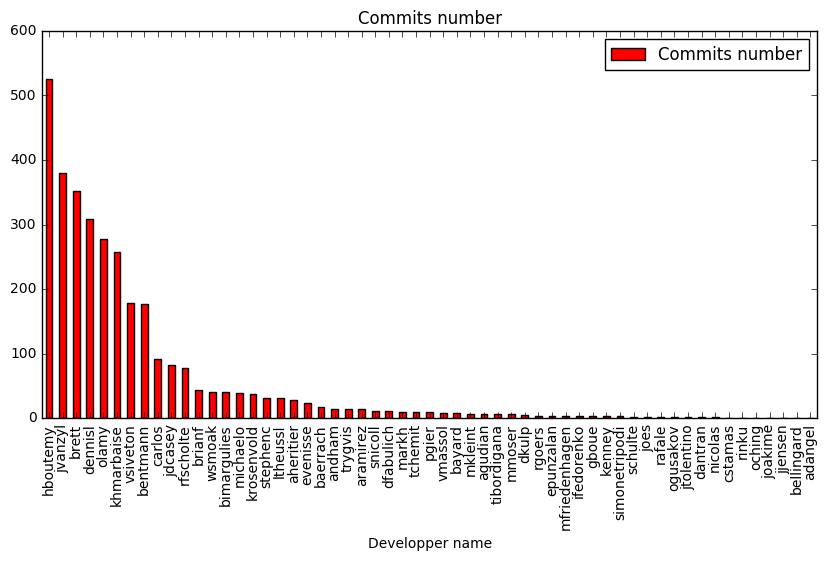

In [40]:
# Create pie graphic for the number of commit per developper
%matplotlib inline
Result_nbComDev_sorted.plot(kind='bar',figsize=(10,5),legend=True,subplots=True,color='r')

In [41]:
#################### END 3 ####################

In [42]:
#################### 4. COMPUTE THE NUMBER OF COMMITS PER TRIMESTRE AND PER DEVELOPPER ####################

In [43]:
#################### BEGIN 4 ####################

In [44]:
# Add date as index because of the role that it will have on the grouping by date
scmlog_date = scmlog_dev[['committer_id_y']].set_index(scmlog_dev.date)

In [45]:
# Group by trimestre and commiter name
commit_per_date_commiter = scmlog_date.groupby([pd.Grouper(freq='Q-DEC'),'committer_id_y'])

In [46]:
# Build a dictionary output for the agregation computing output
commit_per_date_commiter_agg = commit_per_date_commiter.aggregate({'committer_id_y':"count"})

In [47]:
# display result
commit_per_date_commiter_agg
commit_per_date_commiter_agg.columns = [['Commits number']]
commit_per_date_commiter_agg

Commits number
date       committer_id_y                
2005-06-30 brett                       83
           evenisse                     5
           jdcasey                      6
           jvanzyl                      6
2005-09-30 brett                       29
           evenisse                     7
           jdcasey                      9
           jvanzyl                     20
           snicoll                      1
           trygvis                     12
2005-12-31 brett                       59
           carlos                      20
           evenisse                     5
           jdcasey                      7
           jvanzyl                    209
           vmassol                      3
2006-03-31 aheritier                    2
           aramirez                    13
           brett                       24
           carlos                      10
           evenisse                     3
           jdcasey                      9
           jvanzyl                      4
2006-06-30 brett                       14
           carlos                      11
           dennisl                      2
           epunzalan                    4
           evenisse                     4
           jdcasey                     10
           jtolentino                   1
...                                   ...
2015-12-31 dennisl                      1
           hboutemy                    16
           khmarbaise                  32
           michaelo                     4
           rfscholte                    1
           tibordigana                  1
2016-03-31 agudian                      2
           dennisl                      1
           hboutemy                    11
           khmarbaise                  21
           michaelo                     6
           mmoser                       1
           stephenc                     1
           tibordigana                  2
2016-06-30 hboutemy                    14
           khmarbaise                  25
           mfriedenhagen                2
           michaelo                     6
           rfscholte                    1
2016-09-30 gboue                        1
           hboutemy                    16
           khmarbaise                   8
2016-12-31 adangel                      1
           gboue                        2
           hboutemy                     7
           khmarbaise                   3
           michaelo                     3
           olamy                        1
           rfscholte                    4
           schulte                      2

[438 rows x 1 columns]

In [48]:
# Remove the seconde index that is the name of developpers in order to display number of commit per trimestre
nbr_commit_trimestre = commit_per_date_commiter_agg.set_index(commit_per_date_commiter_agg.index.droplevel(1))

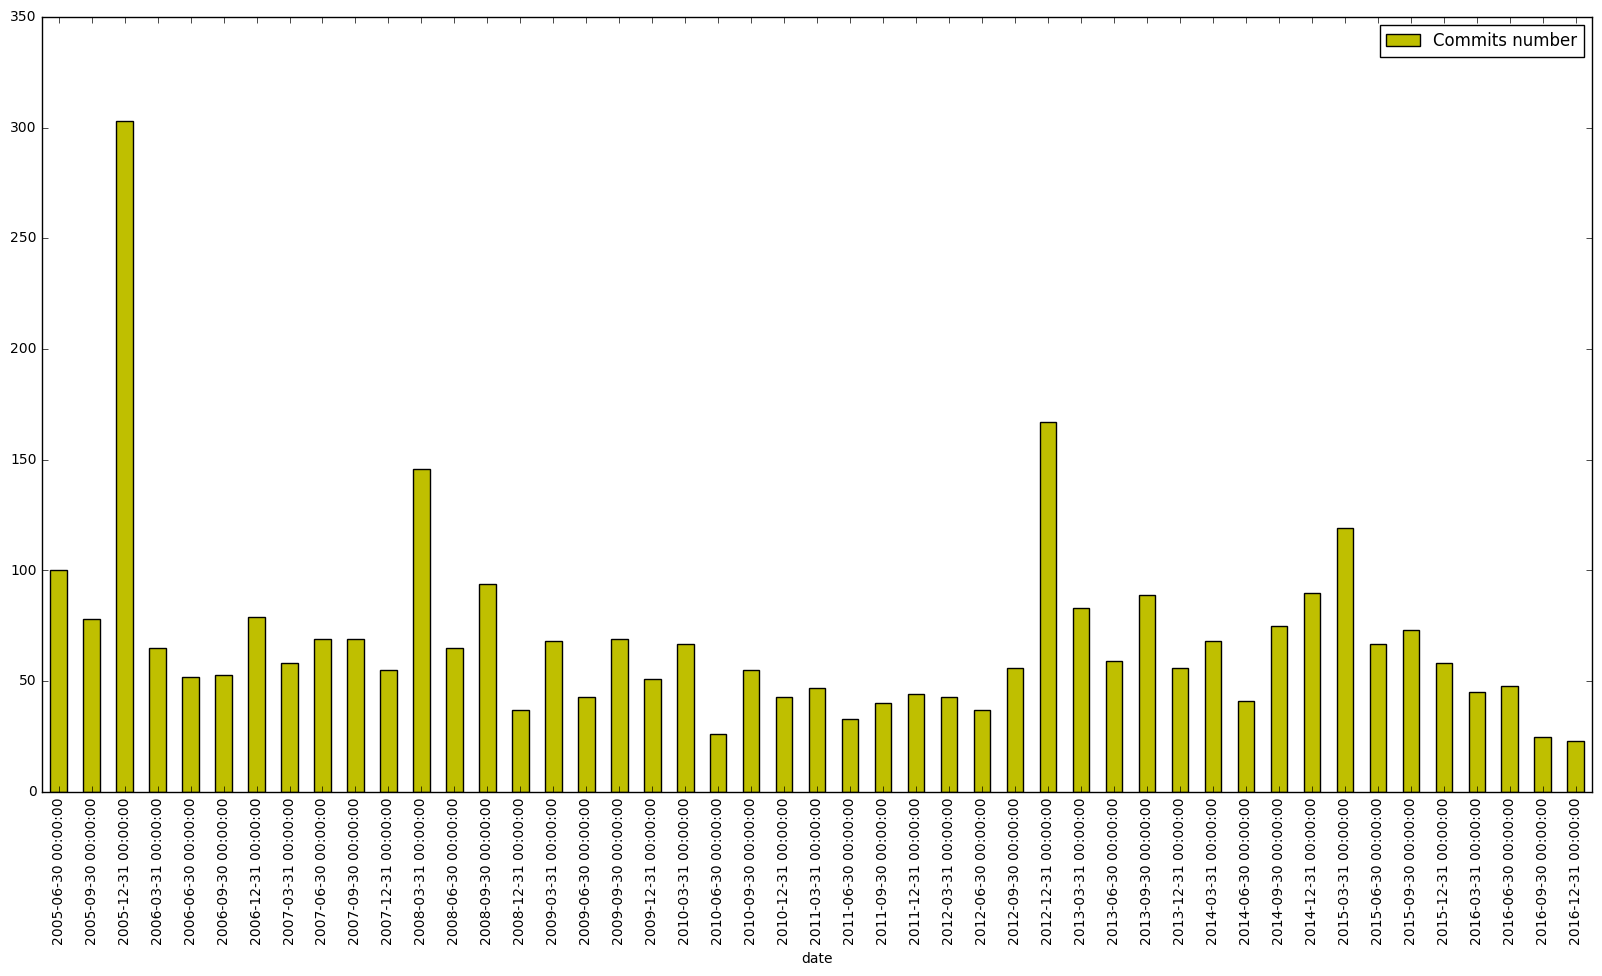

In [49]:
# Display the number of commits per trimestre
%matplotlib inline
nbr_commit_trimestre.groupby(nbr_commit_trimestre.index).aggregate(pd.Series.sum).plot(kind='bar',figsize=(20,10),color='y')

In [50]:
#################### END 4 ####################

In [51]:
#################### 5. COMPUTE THE NUMBER COMMITS ON EACH FILE AND ADD SOME INTERESTING INFOS ####################

In [52]:
#################### Begin 5 ####################

In [53]:
# Count the number of file modification for each file
nbFileModified=actions['file_id'].value_counts()
nbFileModified

1078    333
136     212
1517    196
135     136
11      115
720      92
1691     71
630      65
1519     64
1206     63
1168     58
1169     55
903      54
836      53
60       52
950      49
919      47
1695     45
1514     45
252      43
472      41
1122     40
1113     39
722      38
342      37
1996     36
697      36
1059     34
1697     34
749      33
       ... 
434       1
710       1
726       1
742       1
878       1
1046      1
1006      1
994       1
946       1
942       1
938       1
898       1
894       1
890       1
886       1
882       1
874       1
750       1
870       1
866       1
862       1
838       1
834       1
810       1
806       1
802       1
782       1
766       1
754       1
46        1
Name: file_id, dtype: int64

In [54]:
# Transformation into dataframe in order to sort the result by counts
nbFileModifiedDF=pd.DataFrame(nbFileModified)

In [55]:
#Display the result sort
nbFileModifiedDF_sorted=nbFileModifiedDF.sort(columns='file_id',ascending=False)
nbFileModifiedDF_sorted

/home/nabil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


file_id
1078      333
136       212
1517      196
135       136
11        115
720        92
1691       71
630        65
1519       64
1206       63
1168       58
1169       55
903        54
836        53
60         52
950        49
919        47
1695       45
1514       45
252        43
472        41
1122       40
1113       39
722        38
342        37
1996       36
697        36
1059       34
1697       34
749        33
...       ...
427         1
407         1
399         1
395         1
391         1
387         1
383         1
1580        1
113         1
1328        1
1172        1
2016        1
1392        1
2008        1
1268        1
1264        1
1260        1
185         1
1164        1
1180        1
1240        1
265         1
229         1
1208        1
1212        1
97          1
141         1
1232        1
1236        1
46          1

[1374 rows x 1 columns]

In [56]:
# Rename the count column
nbFileModifiedDF_sorted.columns = [['file changes number']]
nbFileModifiedDF_sorted

file changes number
1078                  333
136                   212
1517                  196
135                   136
11                    115
720                    92
1691                   71
630                    65
1519                   64
1206                   63
1168                   58
1169                   55
903                    54
836                    53
60                     52
950                    49
919                    47
1695                   45
1514                   45
252                    43
472                    41
1122                   40
1113                   39
722                    38
342                    37
1996                   36
697                    36
1059                   34
1697                   34
749                    33
...                   ...
427                     1
407                     1
399                     1
395                     1
391                     1
387                     1
383                     1
1580                    1
113                     1
1328                    1
1172                    1
2016                    1
1392                    1
2008                    1
1268                    1
1264                    1
1260                    1
185                     1
1164                    1
1180                    1
1240                    1
265                     1
229                     1
1208                    1
1212                    1
97                      1
141                     1
1232                    1
1236                    1
46                      1

[1374 rows x 1 columns]

In [57]:
# Create new data frame with file path information in addition to the id and the total number of modification
nbModiFile=pd.merge(nbFileModifiedDF_sorted,file_links[['file_id','file_path']],left_index=True, right_on='file_id')

#Add the name file because there are more that one file that had the same name
nbModiFile_withName = pd.merge(nbModiFile,files[['id','file_name']],left_on='file_id', right_on='id')

# Restructure the data frame to be clear
nbModiFile_restructured = nbModiFile_withName[['file_id','file_path','file_name','file changes number']]
nbModiFile_restructured

file_id                                          file_path  \
0        1078   /maven/site/trunk/src/site/apt/plugins/index.apt   
1         136         /maven/components/trunk/maven-site/pom.xml   
2        1517     maven/site/trunk/content/apt/plugins/index.apt   
3         135  /maven/components/trunk/maven-site/src/site/si...   
4          11  /maven/components/trunk/maven-site/src/site/xd...   
5          11       /maven/site/trunk/src/site/xdoc/index.xml.vm   
6         720  /maven/components/trunk/maven-site/src/site/ap...   
7        1691      maven/site/trunk/content/apt/shared/index.apt   
8         630  /maven/components/trunk/maven-site/src/site/ap...   
9         630  /maven/components/trunk/maven-site/src/site/ap...   
10        630  /maven/components/trunk/maven-site/src/site/ap...   
11        630  /maven/site/trunk/content/apt/guides/developme...   
12       1519  maven/site/trunk/content/filtered-resources/.h...   
13       1206    /maven/site/trunk/src/site/apt/shared/index.apt   
14       1168  /maven/site/trunk/src/site/apt/developers/rele...   
15       1169  /maven/site/trunk/src/site/apt/download.apt.te...   
16       1169        /maven/site/trunk/src/site/apt/download.apt   
17       1169     /maven/site/trunk/src/site/apt/download.apt.vm   
18        903  /maven/components/trunk/maven-site/src/site/ap...   
19        836  /maven/components/trunk/maven-site/src/site/ap...   
20        836  /maven/components/trunk/maven-site/src/site/ap...   
21         60  /maven/components/trunk/maven-site/src/site/xd...   
22         60  /maven/components/trunk/maven-site/src/site/fm...   
23        950  /maven/components/trunk/maven-site/src/site/re...   
24        950  /maven/site/trunk/src/site/filtered-resources/...   
25        919  /maven/components/trunk/maven-site/src/site/ap...   
26        919       /maven/site/trunk/src/site/xdoc/articles.xml   
27       1695  /maven/site/trunk/content/xdoc/download-fast.x...   
28       1695     /maven/site/trunk/content/xdoc/download.xml.vm   
29       1514   /maven/site/trunk/content/resources/extpaths.txt   
...       ...                                                ...   
1447      407  maven/components/trunk/maven-core-it/it0017/.c...   
1448      399  maven/components/trunk/maven-core-it/it0013/.c...   
1449      395  maven/components/trunk/maven-core-it/it0009/.c...   
1450      391  maven/components/trunk/maven-core-it/it0007/.c...   
1451      387  maven/components/trunk/maven-core-it/it0004/.c...   
1452      383  maven/components/trunk/maven-core-it/it0002/.c...   
1453     1580  /maven/site/trunk/content/resources/images/ico...   
1454      113  maven/components/trunk/maven-plugins/maven-com...   
1455     1328  /maven/site/trunk/src/site/apt/docs/2.0.10/rel...   
1456     1172  /maven/site/trunk/src/site/apt/developers/website   
1457     2016                maven/archetypes/trunk/src/site/apt   
1458     2016           /maven/site/trunk/content/apt/archetypes   
1459     1392  /maven/site/trunk/src/site/apt/docs/2.0.9/rele...   
1460     2008    /maven/site/trunk/content/markdown/configure.md   
1461     1268  /maven/site/trunk/src/site/apt/docs/2.0.7/rele...   
1462     1264  /maven/site/trunk/src/site/apt/docs/2.0.5/rele...   
1463     1260  /maven/site/trunk/src/site/apt/docs/2.0.3/rele...   
1464      185  maven/components/trunk/maven-plugins/maven-ins...   
1465     1164  /maven/site/trunk/src/site/apt/developers/release   
1466     1180     maven/plugins/trunk/maven-antlr-plugin/pom.xml   
1467     1240  /maven/site/trunk/src/site/resources/images/Pr...   
1468      265  maven/components/trunk/maven-artifact/src/main...   
1469      229  maven/components/trunk/maven-plugin-tools/mave...   
1470     1208  maven/site/trunk/src/site/apt/guides/mini/guid...   
1471     1212  maven/site/trunk/src/site/apt/guides/mini/inde...   
1472       97                maven/components/trunk/maven-plugin   
1473      141  maven/components/trunk/maven-core/src/main/jav.

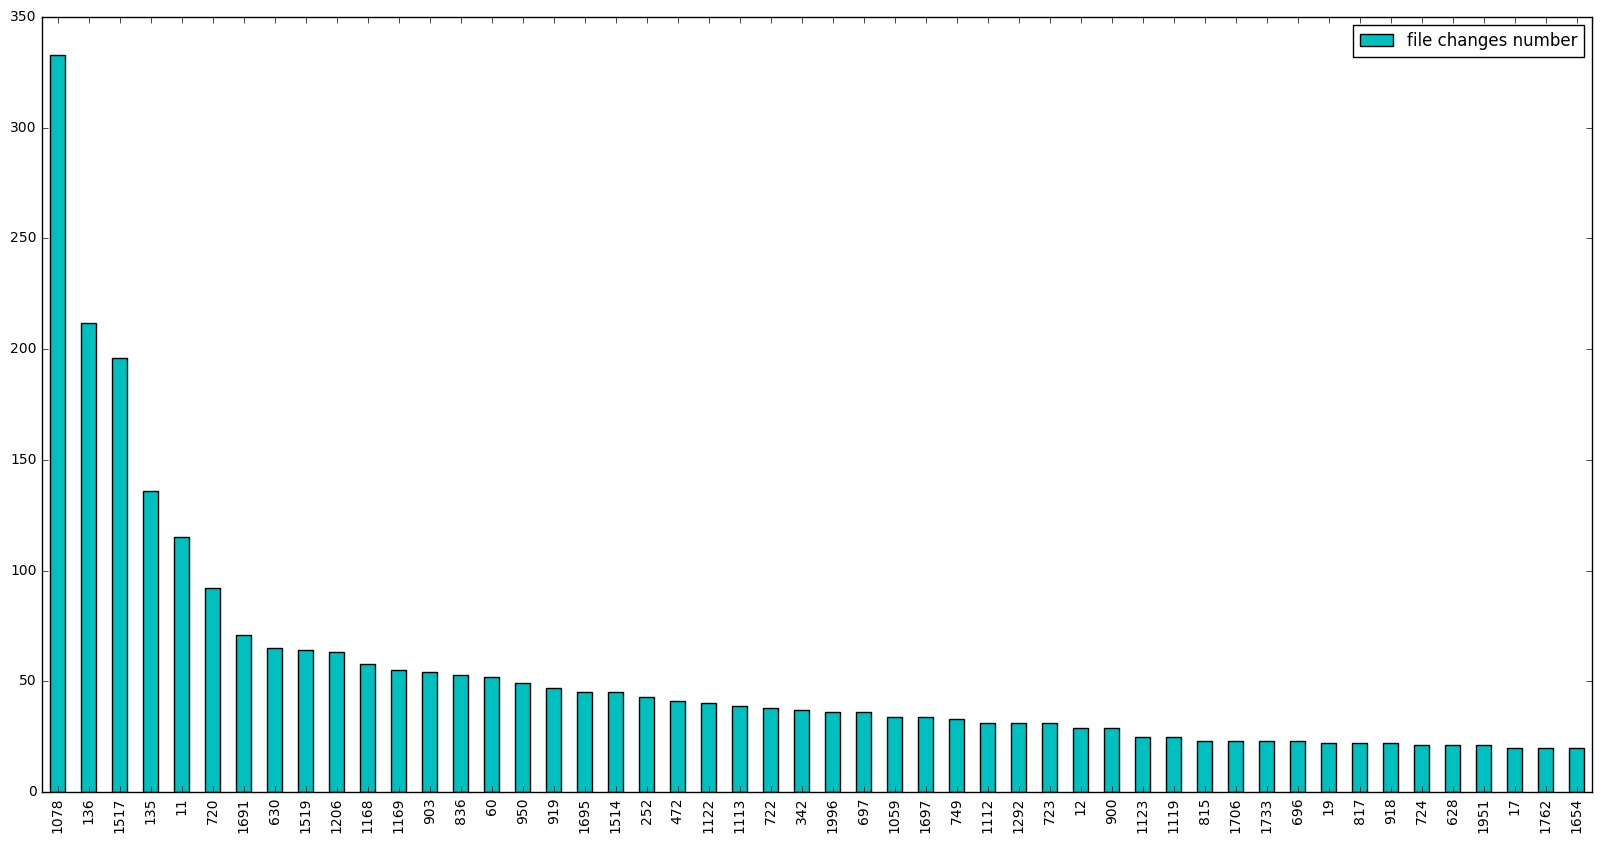

In [58]:
nbFileModifiedDF_sorted.head(50).plot(kind='bar',figsize=(20,10),color='c')

In [59]:
#################### END 5 ####################

In [60]:
#################### 6. COUNT THE NUMBER OF FILES BY COMMIT ####################

In [61]:
#################### BEGIN 6 ####################

In [62]:
# Count the number of files that was treated and sendend with the same commit
nb_fils_per_commit = actions.groupby(['commit_id']).aggregate({'commit_id':"count"})

In [63]:
# Change the name of column and display the result
nb_fils_per_commit.columns=(['nbr_file'])
nb_fils_per_commit_sorted = nb_fils_per_commit.sort(columns='nbr_file',ascending=False)
nb_fils_per_commit_sorted

/home/nabil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


nbr_file
commit_id          
2131            128
1105            125
2631             91
118              86
69               78
98               66
1525             59
2699             53
2960             51
267              40
2606             35
2140             35
2604             35
2603             35
2600             35
2609             34
22               33
1446             33
900              29
1727             29
683              26
2607             26
323              26
84               24
154              23
344              23
358              22
820              22
1091             22
2939             22
...             ...
1285              1
1286              1
1287              1
1288              1
1289              1
1290              1
1292              1
1293              1
1272              1
1270              1
1269              1
1266              1
1248              1
1249              1
1250              1
1251              1
1252              1
1253              1
1254              1
1255              1
1256              1
1257              1
1259              1
1260              1
1261              1
1262              1
1263              1
1264              1
1265              1
3231              1

[3231 rows x 1 columns]

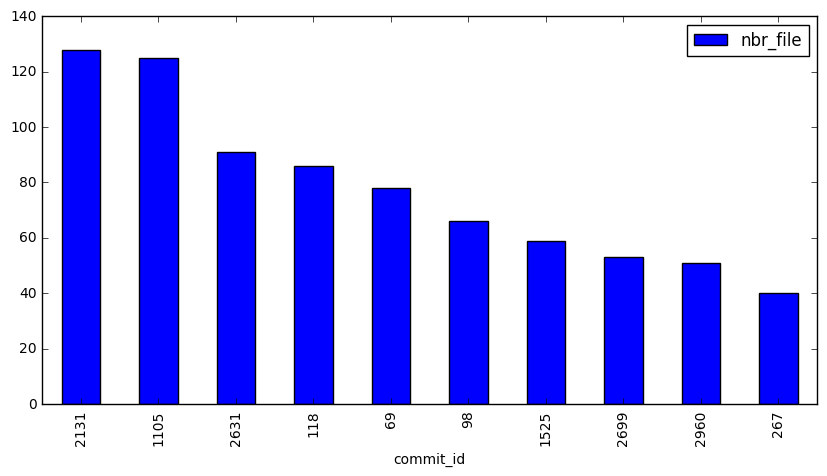

In [64]:
# Display the number of file for each commit
%matplotlib inline
nb_fils_per_commit_sorted.head(10).plot(kind='bar',figsize=(10,5),legend=True,subplots=False)

In [65]:
#################### END 6 ####################

In [66]:
#################### 7. NUMBER OF FILE FOR EACH TYPE ACTIONS ####################

In [67]:
#################### BEGIN 7 ####################

In [68]:
# Keep only columns that are helpful
actions_filtred = actions[['file_id','type']]

In [69]:
# Group actions by files for each type
action_file_per_type = actions_filtred.groupby(['file_id','type']).aggregate({'file_id':"count"})

In [70]:
# give significative name the the count colum
action_file_per_type.columns = ['Count_file']
action_file_per_type

Count_file
file_id type            
4       A              1
        M              9
        V              1
5       A              1
        D              1
        M              1
6       A              1
        D              1
7       A              1
        D              1
        M              4
8       A              1
9       A              1
10      A              1
11      A              1
        M            113
        V              1
12      A              1
        M             27
        V              1
13      A              1
        D              1
        M             10
14      A              1
        D              1
15      A              1
        M              9
        V              1
16      A              1
        D              1
...                  ...
2010    V              1
2011    A              1
2016    V              1
2017    M              2
2018    M              3
2019    A              1
2020    A              1
        M              8
2021    A              1
2022    A              1
2023    A              1
        M             12
2025    D              1
2026    A              1
2027    A              1
2028    M              1
2029    M              1
2030    M              1
2031    M              1
2032    M              1
2033    A              1
2034    A              1
        D              1
2035    A              1
        M              1
2036    C              1
        M              3
2037    M              2
2038    A              1
2039    A              1

[1961 rows x 1 columns]

In [71]:
# Group actions by type
action_per_type = actions_filtred.groupby(['type']).aggregate({'type':"count"})
action_per_type.columns = ['action_per_type']
action_per_type

action_per_type
type                 
A                 706
C                 105
D                 321
M                4863
R                  48
V                 103

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8c01c3d0>], dtype=object)

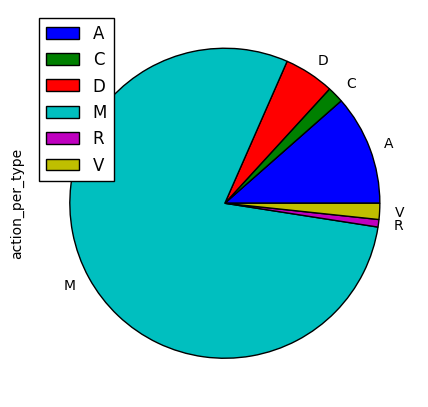

In [72]:
%matplotlib inline
action_per_type.plot(kind='pie',figsize=(5,5),legend=True,subplots=True)

In [73]:
#################### END 7 ####################

In [74]:
#################### 8. Count the number branch that committers work on it ####################

In [75]:
#################### BEGIN 8 ####################

In [76]:
# Compute the number of actions on branchs
actions_in_branch = actions.groupby(['branch_id']).aggregate({'branch_id':"count"})
actions_in_branch.columns = ['count_branch']
actions_in_branch


count_branch
branch_id              
1                  6146

In [77]:
#################### END 8 ####################

In [78]:
#################### COMPUTE THE NUMBER OF YEARS PARTICIPATON IN THE PROJECT FOR DEVELOPPER ####################

In [79]:
#################### BEGIN 9 ####################

In [80]:
#Group the Dev with their dates commits
dev_experiance = scmlog_dev.groupby(['committer_id_y','date']).aggregate({'date':"count"})

# Rename the column 
dev_experiance.columns = ['count']
dev_experiance


count
committer_id_y date                      
adangel        2016-10-16 10:38:10      1
agudian        2013-06-11 11:17:27      1
               2013-08-16 09:56:15      1
               2014-03-15 23:49:23      1
               2014-11-04 21:45:59      1
               2015-05-27 22:35:24      1
               2016-01-20 20:32:16      1
               2016-02-09 20:36:46      1
aheritier      2006-03-05 09:04:52      1
               2006-03-10 01:28:03      1
               2006-07-16 17:55:46      1
               2006-08-01 22:54:47      1
               2007-01-14 03:17:03      1
               2007-01-15 01:14:50      1
               2007-03-15 16:11:05      1
               2007-04-18 21:45:29      1
               2007-07-12 09:05:46      1
               2007-07-12 09:08:48      1
               2008-03-17 23:41:02      1
               2008-03-17 23:48:50      1
               2008-03-18 08:30:16      1
               2008-03-28 01:03:29      1
               2008-04-04 23:07:35      1
               2008-07-31 15:06:12      1
               2008-07-31 15:16:59      1
               2008-08-28 22:04:18      1
               2009-03-22 23:59:57      1
               2009-08-20 11:03:10      1
               2009-10-16 04:36:19      1
               2009-11-17 15:09:53      1
...                                   ...
wsmoak         2006-11-26 05:11:25      1
               2006-12-02 17:14:31      1
               2006-12-10 18:28:15      1
               2006-12-18 02:50:11      1
               2007-03-05 15:20:43      1
               2007-03-11 16:51:32      1
               2007-03-12 16:33:44      1
               2007-04-02 18:43:52      1
               2007-04-02 19:47:38      1
               2007-04-22 20:47:54      1
               2007-05-29 06:07:10      1
               2007-06-17 18:32:35      1
               2007-12-24 05:30:58      1
               2007-12-29 16:45:18      1
               2008-02-11 04:39:09      1
               2008-02-18 07:23:37      1
               2008-02-18 07:30:59      1
               2008-02-18 07:32:35      1
               2008-02-18 19:22:14      1
               2008-02-18 19:26:45      1
               2008-02-23 00:49:32      1
               2008-02-23 00:50:39      1
               2008-02-28 18:12:09      1
               2008-03-02 16:52:53      1
               2008-03-06 04:57:39      1
               2008-03-15 16:08:41      1
               2008-04-08 17:48:30      1
               2008-05-10 18:11:43      1
               2008-08-07 07:10:41      1
               2008-08-14 17:21:41      1

[3231 rows x 1 columns]

In [81]:
# Remove the indexes to obtein the commit
dev_experiance.reset_index(level=0, inplace=True)
dev_experiance.reset_index(level=1, inplace=True)
dev_experiance_new = dev_experiance[['committer_id_y','date']]
dev_experiance_new

committer_id_y                date
0           adangel 2016-10-16 10:38:10
1           agudian 2013-06-11 11:17:27
2           agudian 2013-08-16 09:56:15
3           agudian 2014-03-15 23:49:23
4           agudian 2014-11-04 21:45:59
5           agudian 2015-05-27 22:35:24
6           agudian 2016-01-20 20:32:16
7           agudian 2016-02-09 20:36:46
8         aheritier 2006-03-05 09:04:52
9         aheritier 2006-03-10 01:28:03
10        aheritier 2006-07-16 17:55:46
11        aheritier 2006-08-01 22:54:47
12        aheritier 2007-01-14 03:17:03
13        aheritier 2007-01-15 01:14:50
14        aheritier 2007-03-15 16:11:05
15        aheritier 2007-04-18 21:45:29
16        aheritier 2007-07-12 09:05:46
17        aheritier 2007-07-12 09:08:48
18        aheritier 2008-03-17 23:41:02
19        aheritier 2008-03-17 23:48:50
20        aheritier 2008-03-18 08:30:16
21        aheritier 2008-03-28 01:03:29
22        aheritier 2008-04-04 23:07:35
23        aheritier 2008-07-31 15:06:12
24        aheritier 2008-07-31 15:16:59
25        aheritier 2008-08-28 22:04:18
26        aheritier 2009-03-22 23:59:57
27        aheritier 2009-08-20 11:03:10
28        aheritier 2009-10-16 04:36:19
29        aheritier 2009-11-17 15:09:53
...             ...                 ...
3201         wsmoak 2006-11-26 05:11:25
3202         wsmoak 2006-12-02 17:14:31
3203         wsmoak 2006-12-10 18:28:15
3204         wsmoak 2006-12-18 02:50:11
3205         wsmoak 2007-03-05 15:20:43
3206         wsmoak 2007-03-11 16:51:32
3207         wsmoak 2007-03-12 16:33:44
3208         wsmoak 2007-04-02 18:43:52
3209         wsmoak 2007-04-02 19:47:38
3210         wsmoak 2007-04-22 20:47:54
3211         wsmoak 2007-05-29 06:07:10
3212         wsmoak 2007-06-17 18:32:35
3213         wsmoak 2007-12-24 05:30:58
3214         wsmoak 2007-12-29 16:45:18
3215         wsmoak 2008-02-11 04:39:09
3216         wsmoak 2008-02-18 07:23:37
3217         wsmoak 2008-02-18 07:30:59
3218         wsmoak 2008-02-18 07:32:35
3219         wsmoak 2008-02-18 19:22:14
3220         wsmoak 2008-02-18 19:26:45
3221         wsmoak 2008-02-23 00:49:32
3222         wsmoak 2008-02-23 00:50:39
3223         wsmoak 2008-02-28 18:12:09
3224         wsmoak 2008-03-02 16:52:53
3225         wsmoak 2008-03-06 04:57:39
3226         wsmoak 2008-03-15 16:08:41
3227         wsmoak 2008-04-08 17:48:30
3228         wsmoak 2008-05-10 18:11:43
3229         wsmoak 2008-08-07 07:10:41
3230         wsmoak 2008-08-14 17:21:41

[3231 rows x 2 columns]

In [82]:
# Use a pyhton dictionary in order to have the Developper like Key of the dates commits list
from nltk.book import *

# Python dictionary that represent the Developpers with their dates commits
devDates = dict()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [83]:
# Initialise the dictionary with the keys and empty list for the values
for index, row in dev_experiance_new.iterrows():
    devDates[row['committer_id_y']] = []

In [84]:
# For each developper add all theai dates commits
for index, row in dev_experiance_new.iterrows():
    devDates[row['committer_id_y']].append(row['date'])

In [85]:
# Display result
for cle,valeur in devDates.items(): 
    print cle, valeur

vmassol [Timestamp('2005-11-15 21:44:12'), Timestamp('2005-12-23 15:34:49'), Timestamp('2005-12-29 19:19:31'), Timestamp('2006-09-27 20:04:23'), Timestamp('2006-10-07 10:18:45'), Timestamp('2007-03-15 13:16:40'), Timestamp('2007-12-28 12:29:08'), Timestamp('2007-12-28 12:35:27')]
epunzalan [Timestamp('2006-06-07 07:53:33'), Timestamp('2006-06-15 03:46:10'), Timestamp('2006-06-19 11:52:21'), Timestamp('2006-06-19 12:00:50')]
khmarbaise [Timestamp('2014-02-26 07:51:00'), Timestamp('2014-02-28 19:37:53'), Timestamp('2014-02-28 20:27:07'), Timestamp('2014-03-22 11:39:23'), Timestamp('2014-03-22 11:44:06'), Timestamp('2014-03-22 12:16:39'), Timestamp('2014-03-22 15:05:02'), Timestamp('2014-03-22 15:32:49'), Timestamp('2014-03-22 16:09:32'), Timestamp('2014-03-22 16:36:18'), Timestamp('2014-03-30 14:15:50'), Timestamp('2014-03-30 16:42:50'), Timestamp('2014-06-07 15:44:36'), Timestamp('2014-06-07 19:02:58'), Timestamp('2014-06-07 19:12:10'), Timestamp('2014-06-19 13:08:48'), Timestamp('2014-

In [86]:
# Display result
for cle,valeur in devDates.items(): 
    print cle ,' : Developped from : ', valeur[0], ' To : ', valeur[len(valeur)-1]
    print'\n\n'

vmassol  : Developped from :  2005-11-15 21:44:12  To :  2007-12-28 12:35:27



epunzalan  : Developped from :  2006-06-07 07:53:33  To :  2006-06-19 12:00:50



khmarbaise  : Developped from :  2014-02-26 07:51:00  To :  2016-11-04 22:22:17



bellingard  : Developped from :  2009-09-04 11:02:39  To :  2009-09-04 11:02:39



snicoll  : Developped from :  2005-09-25 10:35:57  To :  2012-09-03 18:15:51



ltheussl  : Developped from :  2007-08-13 17:14:33  To :  2011-10-16 09:08:20



dkulp  : Developped from :  2007-03-09 17:35:45  To :  2008-05-29 17:23:38



rfscholte  : Developped from :  2011-07-07 20:59:08  To :  2016-12-11 20:34:55



stephenc  : Developped from :  2009-10-27 01:00:34  To :  2016-02-01 15:38:36



jvanzyl  : Developped from :  2005-04-13 07:23:44  To :  2015-04-28 19:29:42



hboutemy  : Developped from :  2007-10-18 23:27:47  To :  2016-11-17 12:41:50



nicolas  : Developped from :  2008-02-18 16:05:11  To :  2008-02-25 11:19:54



oching  : Developped from :  

In [87]:
# Compute the time passed on the project
from dateutil.relativedelta import relativedelta
from datetime import datetime

DF_timeDev = DataFrame(columns=('Developper', 'Time developpment in DAYS','Time developpment in YEARS'))
i=0
for cle,valeur in devDates.items():
    if(len(valeur)==1):
        d1 = datetime.strptime(str(valeur[0]), "%Y-%m-%d %H:%M:%S")
        d2 = datetime.strptime(str(valeur[0]), "%Y-%m-%d %H:%M:%S")
    else: 
        d1 = datetime.strptime(str(valeur[0]), "%Y-%m-%d %H:%M:%S")
        d2 = datetime.strptime(str(valeur[len(valeur)-1]), "%Y-%m-%d %H:%M:%S")
    
    DF_timeDev.loc[i] = [cle,d2-d1,relativedelta(d2,d1).years]
    i+=1

In [88]:
# Display result
DF_timeDev

Developper  Time developpment in DAYS  Time developpment in YEARS
0         vmassol          772 days 14:51:15                         2.0
1       epunzalan           12 days 04:07:17                         0.0
2      khmarbaise          982 days 14:31:17                         2.0
3      bellingard            0 days 00:00:00                         0.0
4         snicoll         2535 days 07:39:54                         6.0
5        ltheussl         1524 days 15:53:47                         4.0
6           dkulp          446 days 23:47:53                         1.0
7       rfscholte         1983 days 23:35:47                         5.0
8        stephenc         2288 days 14:38:02                         6.0
9         jvanzyl         3667 days 12:05:58                        10.0
10       hboutemy         3317 days 13:14:03                         9.0
11        nicolas            6 days 19:14:43                         0.0
12         oching            0 days 00:00:00                         0.0
13          markh         1617 days 10:45:44                         4.0
14         andham         1106 days 22:40:54                         3.0
15        agudian          973 days 09:19:19                         2.0
16        tchemit          147 days 09:17:00                         0.0
17         bayard          146 days 07:27:03                         0.0
18        schulte           25 days 17:45:24                         0.0
19     jtolentino          347 days 03:48:57                         0.0
20        jjensen            0 days 00:00:00                         0.0
21     krosenvold         1866 days 14:28:08                         5.0
22      dfabulich          255 days 05:13:34                         0.0
23          gboue           55 days 19:03:32                         0.0
24        jdcasey         3029 days 17:47:17                         8.0
25  simonetripodi            0 days 00:05:49                         0.0
26          rinku            0 days 00:00:00                         0.0
27        adangel            0 days 00:00:00                         0.0
28          brett         3400 days 07:51:55                         9.0
29        mkleint         1344 days 02:36:19                         3.0
30  mfriedenhagen          589 days 23:29:15                         1.0
31       ogusakov           26 days 22:31:38                         0.0
32        trygvis          703 days 12:23:31                         1.0
33      aheritier         2679 days 07:08:26                         7.0
34        cstamas            0 days 00:00:00                         0.0
35         mmoser          203 days 00:28:27                         0.0
36         rafale          252 days 21:18:47                         0.0
37       baerrach         1380 days 02:45:07                         3.0
38    tibordigana          203 days 11:52:36                         0.0
39       vsiveton         1868 days 21:50:56                         5.0
40       michaelo         1056 days 11:32:16                         2.0
41        joakime            0 days 00:00:00                         0.0
42         kenney           99 days 12:45:06                         0.0
43        dennisl         3551 days 13:59:41                         9.0
44       bentmann         1086 days 15:19:09                         2.0
45          olamy         3304 days 01:23:59                         9.0
46     ifedorenko           63 days 14:38:31                         0.0
47       aramirez          160 days 09:20:01                         0.0
48          pgier         1663 days 00:31:36                         4.0
49           joes            0 days 00:00:52                         0.0
50         rgoers          179 days 22:38:54                         0.0
51       evenisse          363 days 21:24:26                         0.0
52         wsmoak          651 days 15:25:17                         1.0
53    bimargulies         1581 days 11:32:55                     

In [89]:
# Sorted result
DF_timeDev.sort(columns='Time developpment in DAYS',ascending=False)

/home/nabil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


Developper  Time developpment in DAYS  Time developpment in YEARS
9         jvanzyl         3667 days 12:05:58                        10.0
43        dennisl         3551 days 13:59:41                         9.0
28          brett         3400 days 07:51:55                         9.0
10       hboutemy         3317 days 13:14:03                         9.0
45          olamy         3304 days 01:23:59                         9.0
24        jdcasey         3029 days 17:47:17                         8.0
33      aheritier         2679 days 07:08:26                         7.0
4         snicoll         2535 days 07:39:54                         6.0
8        stephenc         2288 days 14:38:02                         6.0
56         carlos         2236 days 11:03:05                         6.0
7       rfscholte         1983 days 23:35:47                         5.0
39       vsiveton         1868 days 21:50:56                         5.0
21     krosenvold         1866 days 14:28:08                         5.0
48          pgier         1663 days 00:31:36                         4.0
13          markh         1617 days 10:45:44                         4.0
53    bimargulies         1581 days 11:32:55                         4.0
5        ltheussl         1524 days 15:53:47                         4.0
54         brianf         1387 days 11:41:00                         3.0
37       baerrach         1380 days 02:45:07                         3.0
29        mkleint         1344 days 02:36:19                         3.0
14         andham         1106 days 22:40:54                         3.0
44       bentmann         1086 days 15:19:09                         2.0
40       michaelo         1056 days 11:32:16                         2.0
2      khmarbaise          982 days 14:31:17                         2.0
15        agudian          973 days 09:19:19                         2.0
0         vmassol          772 days 14:51:15                         2.0
32        trygvis          703 days 12:23:31                         1.0
52         wsmoak          651 days 15:25:17                         1.0
30  mfriedenhagen          589 days 23:29:15                         1.0
6           dkulp          446 days 23:47:53                         1.0
51       evenisse          363 days 21:24:26                         0.0
19     jtolentino          347 days 03:48:57                         0.0
22      dfabulich          255 days 05:13:34                         0.0
36         rafale          252 days 21:18:47                         0.0
38    tibordigana          203 days 11:52:36                         0.0
35         mmoser          203 days 00:28:27                         0.0
50         rgoers          179 days 22:38:54                         0.0
47       aramirez          160 days 09:20:01                         0.0
16        tchemit          147 days 09:17:00                         0.0
17         bayard          146 days 07:27:03                         0.0
42         kenney           99 days 12:45:06                         0.0
46     ifedorenko           63 days 14:38:31                         0.0
23          gboue           55 days 19:03:32                         0.0
31       ogusakov           26 days 22:31:38                         0.0
18        schulte           25 days 17:45:24                         0.0
1       epunzalan           12 days 04:07:17                         0.0
55        dantran            9 days 07:58:20                         0.0
11        nicolas            6 days 19:14:43                         0.0
25  simonetripodi            0 days 00:05:49                         0.0
49           joes            0 days 00:00:52                         0.0
12         oching            0 days 00:00:00                         0.0
26          rinku            0 days 00:00:00                         0.0
20        jjensen            0 days 00:00:00                         0.0
3      bellingard            0 days 00:00:00                     

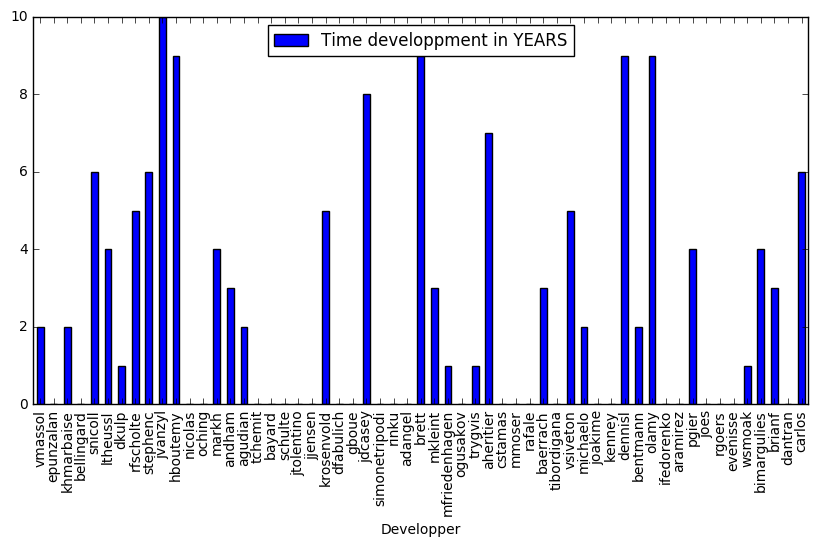

In [90]:
# Add developpers name as index to display it in the graphic
%matplotlib inline
DF_timeDev[['Developper','Time developpment in YEARS']].set_index('Developper').plot(kind='bar',figsize=(10,5),legend=True)

In [91]:
#################### END 8 ####################